# Initial Inspection of the full dataset
To familiarize ourselves with the dataset that we are going to work with, we do some preliminary EDA on the full dataset.

### About Dataset

- **Age:** Represents the age of the patient in years. Age can be a risk factor for diabetes, as the risk of diabetes increases with age.

- **Gender:** Indicates the gender of the patient, which can be a factor in the prediction of diabetes. Some studies suggest that women may have a different risk than men in developing diabetes.

- **Body Mass Index (BMI):** BMI is a measure that uses a person's height and weight to determine whether they are in the normal weight, overweight, or obese category. A high BMI is associated with a higher risk of diabetes.

- **Chol:** total cholesterol level in the blood. Cholesterol is a fat found in the blood and can come from foods consumed and also be produced by the body. High cholesterol can be a risk factor for heart disease and diabetes.

- **TG (Triglycerides):** Represents the level of triglycerides in the blood. Triglycerides are a type of fat found in the blood, and high levels can also increase the risk of heart disease and diabetes.

- **HDL (High-Density Lipoprotein):** Is the "good" cholesterol that helps transport excess cholesterol from body tissues back to the liver for further processing or excretion. High levels of HDL are usually considered good for heart health.

- **LDL (Low-Density Lipoprotein):** Is the "bad" cholesterol that can cause plaque buildup in the arteries, increasing the risk of heart disease and stroke. High LDL levels can be a risk factor for diabetes.

- **Cr (Creatinine):** A waste product of muscle metabolism that is excreted from the body through the kidneys. Creatinine levels in the blood can provide information about kidney function. Kidney disease may be linked to the risk of diabetes.

- **BUN (Blood Urea Nitrogen):** Is a measure used to evaluate kidney and liver function. High levels of BUN may indicate kidney or liver disorders that can be related to diabetes.

- **Diagonisis:** An indicator that someone has diabetes.


> [Source](https://www.kaggle.com/datasets/simaanjali/diabetes-classification-dataset)

### 1. Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### 2. Load and inspect the full dataset

In [143]:
# Load and inspect
ds = pd.read_csv("..\Data\Dataset.csv")
ds

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...
5127,5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [144]:
# Drop the unknown column
ds = ds.drop(columns=["Unnamed: 0"])

# Summary statistics
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5132.0,48.950312,14.048794,20.000000,36.00,49.00,59.00,93.00
BMI,5132.0,24.613406,4.277205,15.000000,22.00,24.00,27.00,47.00
Chol,5132.0,4.866882,1.001052,0.000000,4.19,4.80,5.46,11.65
TG,5132.0,1.719328,1.327057,0.000000,0.91,1.38,2.10,32.64
HDL,5132.0,1.593305,1.038849,0.000000,1.09,1.30,1.59,9.90
LDL,5132.0,2.914121,0.945423,0.300000,2.29,2.79,3.40,9.90
Cr,5132.0,71.144800,28.494394,4.860753,58.00,70.20,81.60,800.00
BUN,5132.0,4.896969,1.689206,0.500000,3.90,4.72,5.60,38.90
Diagnosis,5132.0,0.388348,0.487422,0.000000,0.00,0.00,1.00,1.00


In [125]:
# Check info & shape
print(ds.info(), ds.shape, sep="\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5132 non-null   int64  
 1   Gender     5132 non-null   object 
 2   BMI        5132 non-null   int64  
 3   Chol       5132 non-null   float64
 4   TG         5132 non-null   float64
 5   HDL        5132 non-null   float64
 6   LDL        5132 non-null   float64
 7   Cr         5132 non-null   float64
 8   BUN        5132 non-null   float64
 9   Diagnosis  5132 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 401.1+ KB
None

(5132, 10)


In [126]:
# Check for missing values
ds.isna().sum()

Age          0
Gender       0
BMI          0
Chol         0
TG           0
HDL          0
LDL          0
Cr           0
BUN          0
Diagnosis    0
dtype: int64

In [ ]:
# Check for duplicates
dup = ds.duplicated().sum().tolist()
print(f"Count of duplicated data: {dup}")

Count of duplicated data: 0


In [149]:
# First, Check for value counts of categorical features 
cat_cols = ds.select_dtypes(include=["object", "category"]).columns.tolist()
target_col = ["Diagnosis"]

# Second, fix the one glitch
ds[cat_cols[0]] = ds[cat_cols[0]].replace("f", "F")

for col in [cat_cols, target_col]:
    print(ds[col].value_counts(), 20*"--", sep="\n")

# Print uniqueness
for col in [cat_cols, target_col]:
    print(f"{col[0]} column values: {ds[col[0]].unique()}", 20*"--", sep="\n")

# Target column `Diagnosis` distribution in percent
target_pct = ds[target_col].value_counts(normalize=True) * 100

# `Gender feature` distribution in percent
gender_pct = ds[cat_cols[0]].value_counts(normalize=True) * 100

print(target_pct, gender_pct, sep=f"\n{20*'--'}\n")


Gender
M         3256
F         1876
Name: count, dtype: int64
----------------------------------------
Diagnosis
0            3139
1            1993
Name: count, dtype: int64
----------------------------------------
Gender column values: ['F' 'M']
----------------------------------------
Diagnosis column values: [0 1]
----------------------------------------
Diagnosis
0            61.165238
1            38.834762
Name: proportion, dtype: float64
----------------------------------------
Gender
M    63.445051
F    36.554949
Name: proportion, dtype: float64


> Note: Since `Gender Feature` is object ('F' 'M'), They will be converted into 0s & 1s to show the distribution alongside other numerical features and for consistency.

In [151]:
# Encode `General feature`
# F -> 0 , M -> 1
ds["Gender"] = ds["Gender"].replace({"F": 0, "M": 1}).astype(int).infer_objects(copy=False)
ds["Gender"]

0       0
1       1
2       1
3       0
4       0
       ..
5127    1
5128    0
5129    1
5130    0
5131    1
Name: Gender, Length: 5132, dtype: int64

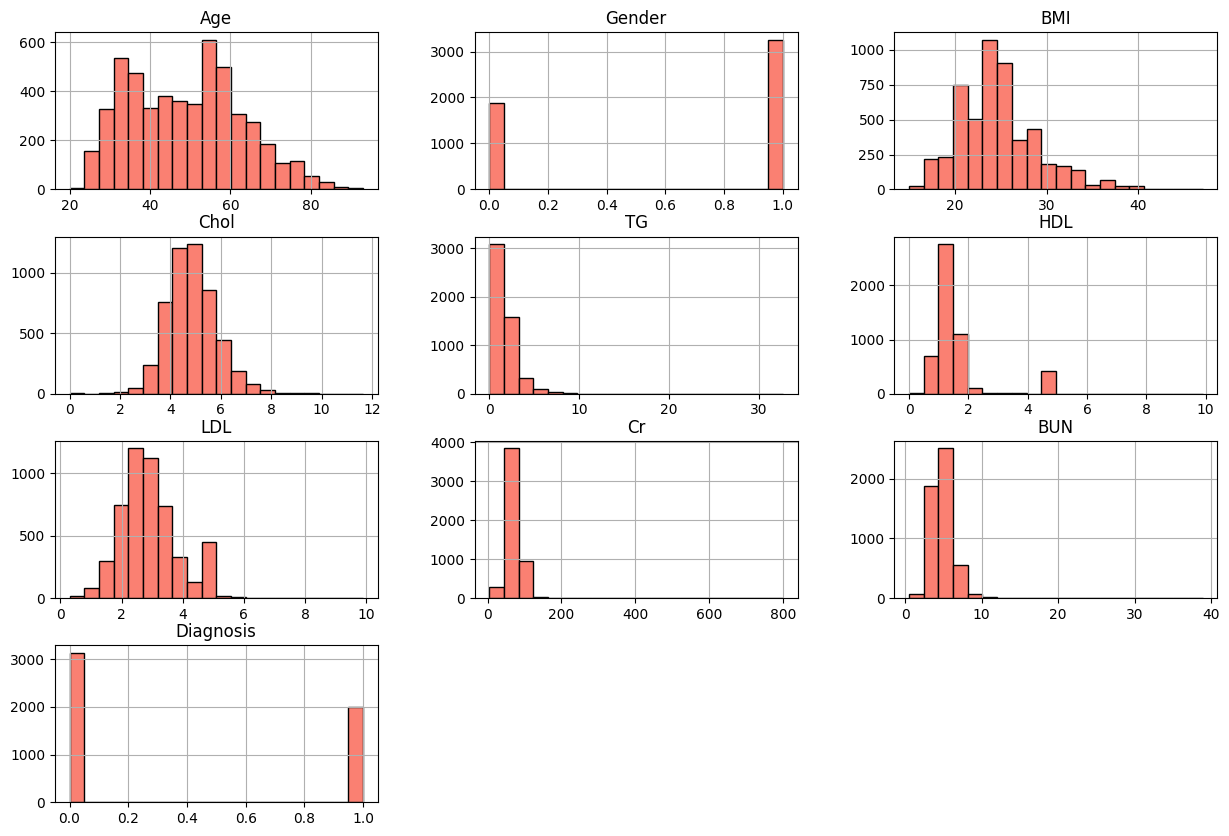

In [152]:
# Visualize distribution of features and target
ds.hist(figsize=(15, 10), color="salmon", edgecolor="k", bins=20)
plt.show()

> Note: Diagnosis that is the target column & Gender feature are categorical with 0s & 1s .